In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json

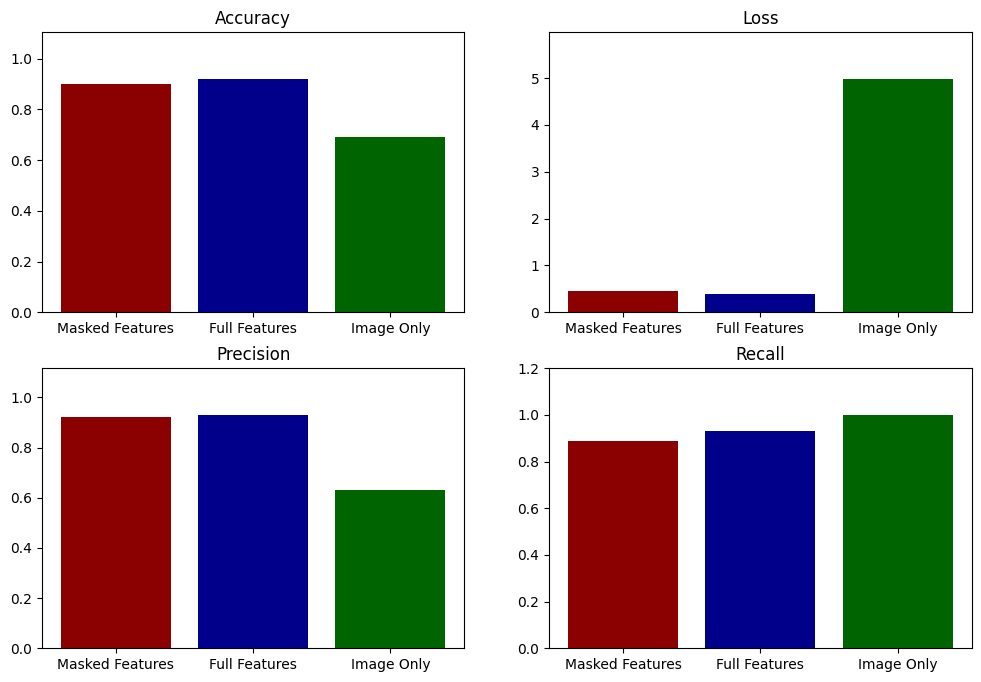

In [83]:
masked_features = {
    "val_accuracy": 0.90,
    "val_loss": 0.46,
    "val_precision": 0.92,
    "val_recall": 0.89
}
full_features = {
    "val_accuracy": 0.92,
    "val_loss": 0.39,
    "val_precision": 0.93,
    "val_recall": 0.93
}
image_only = {
    "val_accuracy": 0.69,
    "val_loss": 4.98,
    "val_precision": 0.63,
    "val_recall": 1.00
}   
metrics = ["val_accuracy", "val_loss", "val_precision", "val_recall"]
models = ["Masked Features", "Full Features", "Image Only"]

data = {
    "val_accuracy": [masked_features["val_accuracy"], full_features["val_accuracy"], image_only["val_accuracy"]],
    "val_loss" : [masked_features["val_loss"], full_features["val_loss"], image_only["val_loss"]],
    "val_precision": [masked_features["val_precision"], full_features["val_precision"], image_only["val_precision"]],
    "val_recall": [masked_features["val_recall"], full_features["val_recall"], image_only["val_recall"]]
}
plt.style.use('default') 

fig, ax = plt.subplots(2, 2, figsize=(12,8))
axs = ax.flatten()
for i, metric in enumerate(metrics):
    axs[i].bar(models, data[metric], color=['darkred', 'darkblue', 'darkgreen'])
    axs[i].set_title(metric.replace("val_", "").capitalize())
    axs[i].set_ylim(0, max(data[metric]) * 1.2)

#plt.savefig('C:\\Users\\clombardi\\abalation_study.png')

In [86]:
filepath = "C:/Users/clombardi/ImageProcessingClone/src/mlruns/666790921765345951/c1a1f085055845ee865c39d98d1335ed/artifacts/test_episodes.json"
with open(filepath, 'r') as f:
    data = json.load(f)

In [89]:
def gather_data(data):
    episode_info = []
    for j, episode in enumerate(data['episodes']):
        fiber_type = episode['fiber type']
        info = episode['episode info']
        start_tension = episode['start tension']
        for i in info:
            metrics = {
                "fiber type": fiber_type,
                "start tension": start_tension,
                "episode": j + 1,
                "current tension": i['current_tension'],
                "current ideal tension": i["current_ideal_tension"],
                "action": i['action']
            }
            episode_info.append(metrics)
    df = pd.DataFrame(episode_info)
    return df

In [164]:
filepath = "C:/Users/clombardi/ImageProcessingClone/src/mlruns/666790921765345951/797e5b4501574cfb89e5ef7eaff05eb0/artifacts/test_episodes.json"
with open(filepath, 'r') as f:
    data = json.load(f)

In [110]:
filepath = "C:/Users/clombardi/ImageProcessingClone/src/mlruns/666790921765345951/62027dea6d2246adab6b33bd84269116/artifacts/test_episodes.json"
with open(filepath, 'r') as f:
    data = json.load(f)

In [87]:
filepath = "C:/Users/clombardi/ImageProcessingClone/src/mlruns/666790921765345951/20a85b6f4fd14c54a3669cef5272bc96/artifacts/test_episodes.json"
with open(filepath, 'r') as f:
    data = json.load(f)

In [94]:
filepath = "C:/Users/clombardi/ImageProcessingClone/src/mlruns/666790921765345951/3f542bc08e294e3fa8875c68fdebcc63/artifacts/test_episodes.json"
with open(filepath, 'r') as f:
    data = json.load(f)

In [95]:
df = gather_data(data)

In [92]:
def plot_func(df, figsize, episode_range, agent_number):

    fig, axes = plt.subplots(2, 3, figsize=figsize)
    axes = axes.flatten()  
    
    
    for i, episode in enumerate(range(episode_range[0], episode_range[1])):
        ax = axes[i]
        start_tension = df.loc[df['episode'] == episode, 'start tension'].iloc[0]
        tensions = df.loc[df['episode'] == episode, 'current tension']
        fiber_type = df.loc[df['episode'] == episode, 'fiber type'].iloc[0]
        ideal_tension = df.loc[df['episode'] == episode, 'current ideal tension'].iloc[0]
        ax.scatter(0, start_tension)
        ax.grid(True, linestyle="--", alpha=0.4)
        x = np.arange(1, len(tensions))
        ax.scatter(x, tensions[:len(x)])
        ax.set_title(f'{episode}: {fiber_type} Target Tension: {ideal_tension:.0f}g')
        ax.set_xlabel('Timestep')
        if len(tensions) == 1:
            ax.set_xticks([0,1])
        ax.margins(x=0.1, y=0.1)
        if i % 3 == 0: 
            ax.set_ylabel('Tension (g)')
    
    
    
    plt.suptitle(f"Tension Change Across Episodes: Agent {agent_number}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f"C:\\Users\\clombardi\\RL_training_agent{agent_number}.png")
    plt.show()

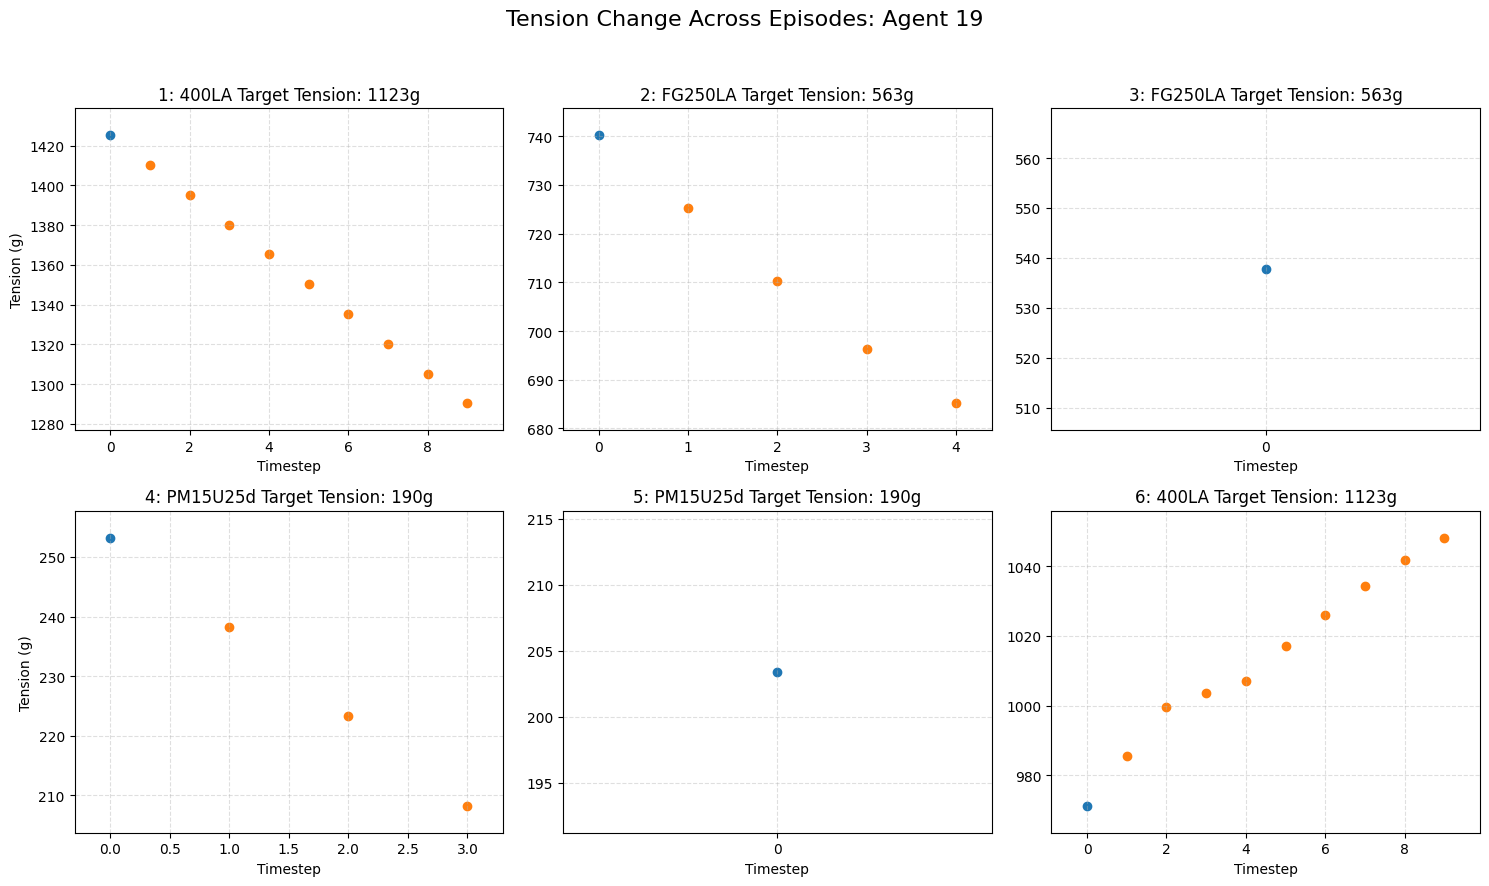

In [96]:
plot_func(df, figsize=(15, 9), episode_range = (1, 7), agent_number=19)

In [4]:
csv_path = "C:\\Users\\clombardi\\FG250LA_1\\Individual_Trials\\mlp_model_1_performance.csv"
df = pd.read_csv(csv_path)

In [30]:
def calc_mae_tensions(df):
    x = df['pred_t']
    y = df['current_tension']
    return np.mean(np.abs(y - x))

def calc_mae_delta(df):
    x = df['pred_delta']
    y = df['true_delta']
    return np.mean(np.abs(y - x))

In [9]:
mae_delta1 = calc_mae_delta(df)
print(mae_delta1)

28.365264705882357


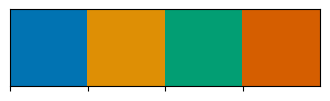

In [6]:
palette = sns.color_palette("colorblind", 4)
sns.set_palette(palette)
sns.palplot(palette)
sns.set_style("white")

In [71]:
def plot_current_vs_pred(df, title, save_path):
    current_tensions = df['current_tension']
    predicted_tensions = df['pred_t']
    target_tension = current_tensions[0] + df['true_delta'][0]
    fig, ax = plt.subplots(figsize=(9,5))
    x = np.arange(len(current_tensions))
    ax.set_title(title)
    ax.set_xlabel("True Tension (g)")
    ax.set_ylabel("Predicted Tension (g)")
    slope, intercept = np.polyfit(current_tensions, predicted_tensions, deg=1)
    y_pred = np.polyval((slope, intercept), current_tensions)
    ax.plot(current_tensions, y_pred, color=palette[1], linestyle="--", label="Regression Line")
    ax.scatter(current_tensions, predicted_tensions, label="Tensions", color=palette[0])
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
]
    plt.plot(lims, lims, '--', alpha=0.5, zorder=0, color=palette[2], label='Ideal Fit') 
    ax.legend(loc="lower right")
    plt.savefig(f"C:\\Users\\clombardi\\{save_path}.png")
    plt.grid(True, alpha=0.5, linestyle="--")
    print(1-slope)
    plt.savefig(f"G:\\Intern_Project_2025\\metrics\\XGBoost_MLP_metrics\\{save_path}.png")

In [129]:
def plot_deltas(df, title, save_path):
    pred_delta = df['pred_delta']
    true_delta = df['true_delta']
    fig, ax = plt.subplots(figsize=(9,5))
    ax.set_title(title)
    ax.set_xlabel("True Delta (g)")
    ax.set_ylabel("Predicted Delta (g)")
    slope, intercept = np.polyfit(true_delta, pred_delta, deg=1)
    y_pred = np.polyval((slope, intercept), true_delta)
    ax.plot(true_delta, y_pred, color=palette[1], linestyle="--", label="Regression Line")
    ax.scatter(true_delta, pred_delta, label="Delta Tension", color=palette[0])
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
]
    plt.plot(lims, lims, '--', alpha=0.5, zorder=0, color=palette[2], label='Ideal Fit') 
    ax.legend(loc="lower right")
    plt.savefig(f"C:\\Users\\clombardi\\{save_path}.png")
    plt.grid(True, alpha=0.5, linestyle="--")
    #ax.set_xticks(np.arange(-250, 250, 100))
    #ax.set_yticks(np.arange(-250, 250, 100))
    print(1-slope)
    plt.savefig(f"G:\\Intern_Project_2025\\metrics\\XGBoost_MLP_metrics\\{save_path}.png")

0.2422354420012226


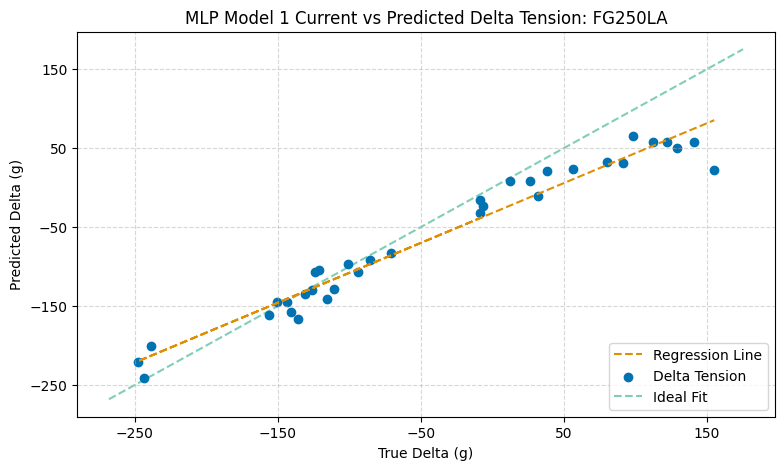

In [114]:
plot_deltas(df, "MLP Model 1 Current vs Predicted Delta Tension: FG250LA", "current_vs_predicted_delta_mlp_FG250LA")

0.7577645385719799


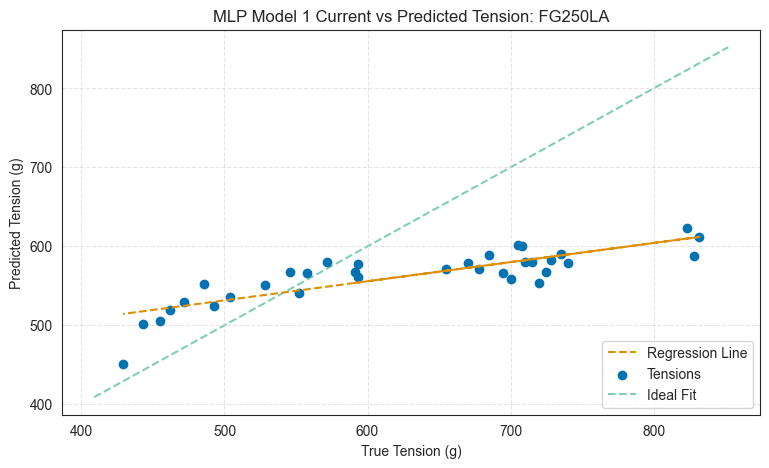

In [60]:
plot_current_vs_pred(df, "MLP Model 1 Current vs Predicted Delta Tension: FG250LA", "current_vs_predicted_delta_mlp_FG250LA")

In [243]:
def plot_regressor(df, title, save_path):
    current_tensions = df['current_tension']
    predicted_tensions = df['pred_t']
    target_tension = current_tensions[0] + df['true_delta'][0]
    fig, ax = plt.subplots(figsize=(9,5))
    x = np.arange(len(current_tensions))
    ax.set_title(title)
    ax.set_xlabel("Trial Number")
    ax.set_ylabel("Tension (g)")
    ax.scatter(x, current_tensions, label="Current Tension", color=palette[0])
    ax.scatter(x, predicted_tensions, label="Predicted Tension", color=palette[1])
    ax.legend(loc="lower left")
    ax.axhline(target_tension, label="Ideal Tension", linestyle="--", color=palette[2])
    plt.savefig(f"C:\\Users\\clombardi\\{save_path}.png")
    plt.savefig(f"G:\\Intern_Project_2025\\metrics\\XGBoost_MLP_metrics\\{save_path}.png")

In [10]:
csv_path = "C:\\Users\\clombardi\\FG250LA_1\\Individual_Trials\\xgb1_performance.csv"
df = pd.read_csv(csv_path)

In [11]:
mae_delta2 = calc_mae_delta(df)
mae_delta2

np.float64(36.79383333333334)

0.24754055163794642


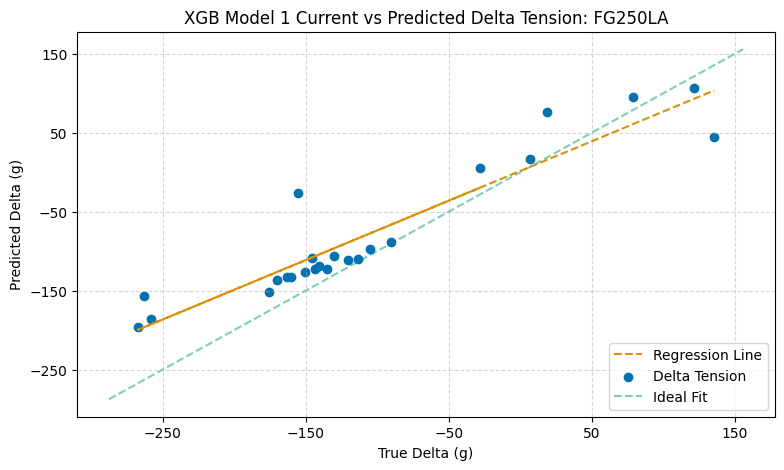

In [116]:
plot_deltas(df, "XGB Model 1 Current vs Predicted Delta Tension: FG250LA", "current_vs_predicted_delta_xgb_FG250LA")

0.7524594483620539


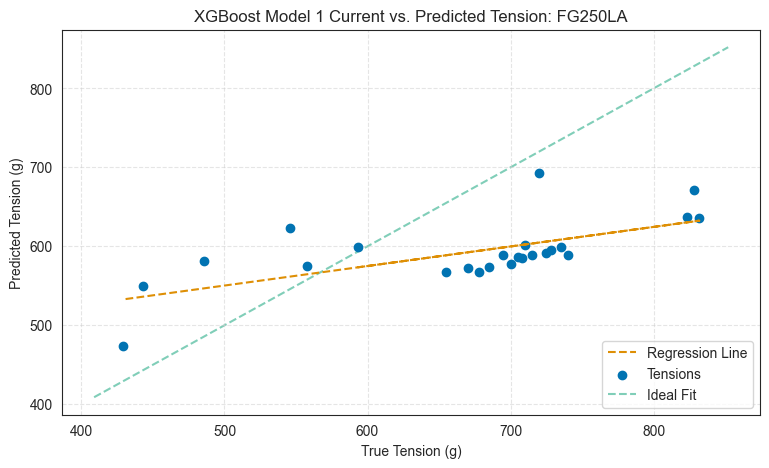

In [58]:
plot_current_vs_pred(df, "XGBoost Model 1 Current vs. Predicted Tension: FG250LA", "current_vs_predicted_xgb_FG250LA")

In [13]:
csv_path = "C:\\Users\\clombardi\\400LA_Train3\\Individual_Trials\\mlp_model_3_performance.csv"
df = pd.read_csv(csv_path)

In [14]:
mae_delta3 = calc_mae_delta(df)
mae_delta3

np.float64(90.71555873015873)

0.5318182130504914


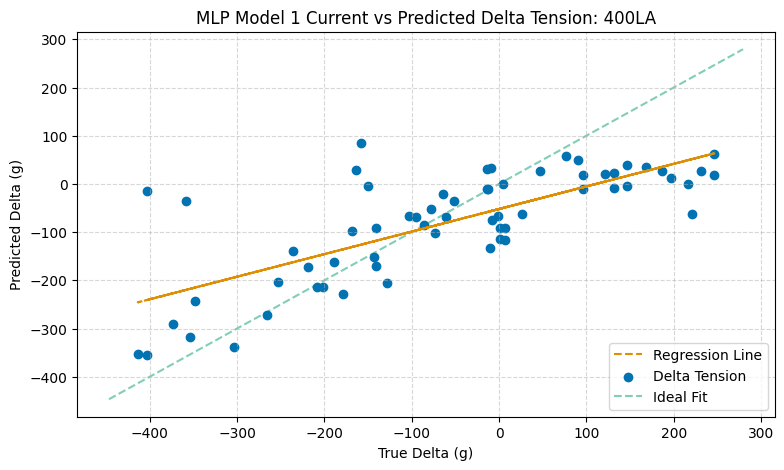

In [131]:
plot_deltas(df, "MLP Model 1 Current vs Predicted Delta Tension: 400LA", "current_vs_predicted_delta_mlp_400LA")

0.46818177900259605


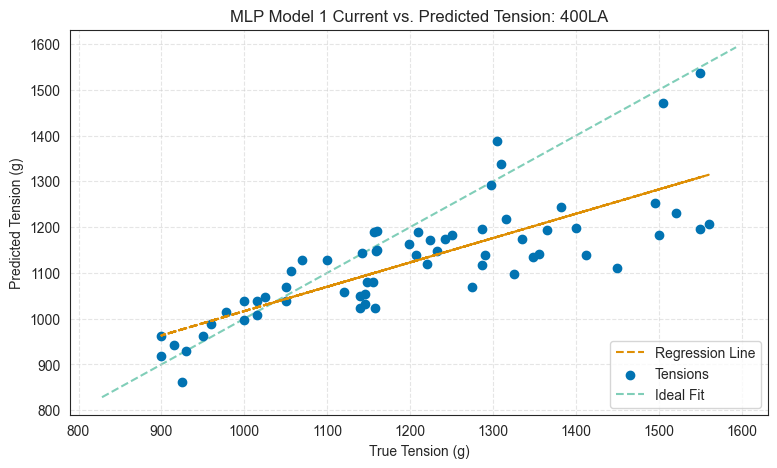

In [62]:
plot_current_vs_pred(df, "MLP Model 1 Current vs. Predicted Tension: 400LA", "current_vs_predicted_mlp_400LA")

In [15]:
csv_path = "C:\\Users\\clombardi\\400LA_Train3\\Individual_Trials\\xgb5_performance.csv"
df = pd.read_csv(csv_path)

In [16]:
mae_delta4 = calc_mae_delta(df)
mae_delta4

np.float64(74.94371568627449)

0.3943783783306406


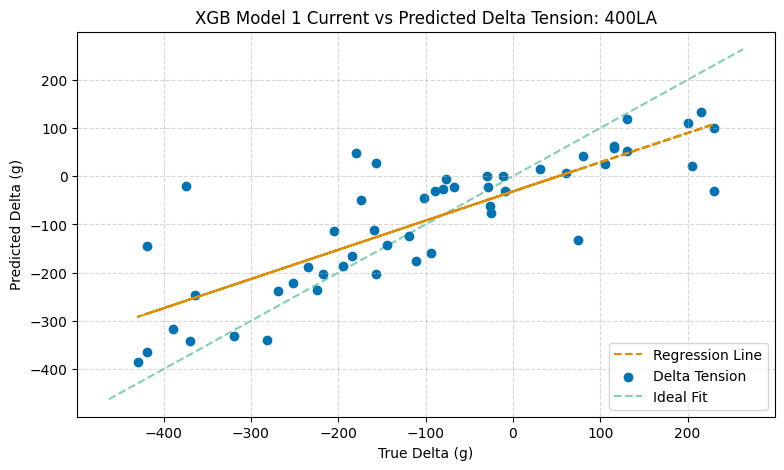

In [133]:
plot_deltas(df, "XGB Model 1 Current vs Predicted Delta Tension: 400LA", "current_vs_predicted_delta_xgb_400LA")

0.6056216216693593


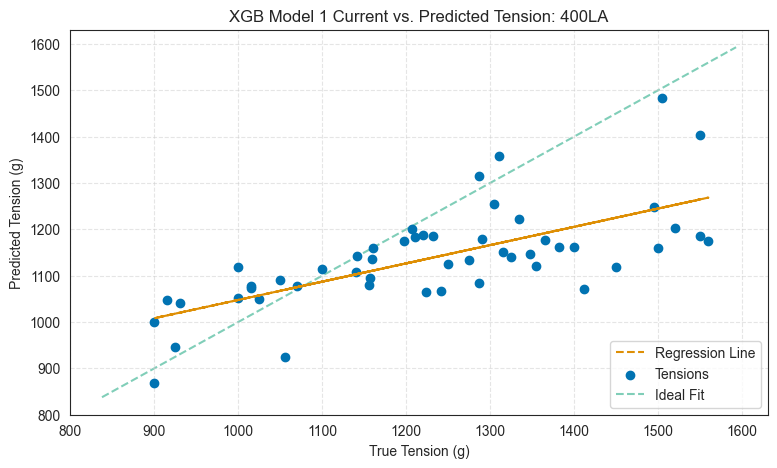

In [64]:
plot_current_vs_pred(df, "XGB Model 1 Current vs. Predicted Tension: 400LA", "current_vs_predicted_xgb_400LA")

In [23]:
csv_path = "C:\\Users\\clombardi\\Training_Runs_7_7\\Individual_Trials\\xgb3.pkl_performance.csv"
df = pd.read_csv(csv_path)

In [24]:
mae_delta6 = calc_mae_delta(df)
mae_delta6

np.float64(6.832162162162163)

In [68]:
data = [
    ["FG250LA", "MLP", round(mae_delta1,2)],
    ["FG250LA", "XGB", round(mae_delta2,2)],
    ["400LA", "MLP", round(mae_delta3,2)],
    ["400LA", "XGB", round(mae_delta4,2)],
    ["125PM", "MLP", round(mae_delta5,2)],
    ["125PM", "XGB", round(mae_delta6,2)],
    ["125PM", "Unified", round(mae_delta7, 2)],
    ["400LA", "Unified", round(mae_delta8, 2)],
    ["FG250LA", "Unified", round(mae_delta9, 2)]
]
data_df = pd.DataFrame(data, columns=["FiberType", "Model", "MAE_Delta (g)"])
data_df

,FiberType,Model,MAE_Delta (g)
0,FG250LA,MLP,28.37
1,FG250LA,XGB,36.79
2,400LA,MLP,90.72
3,400LA,XGB,74.94
4,125PM,MLP,5.47
5,125PM,XGB,6.83
6,125PM,Unified,10.80
7,400LA,Unified,98.19
8,FG250LA,Unified,38.60


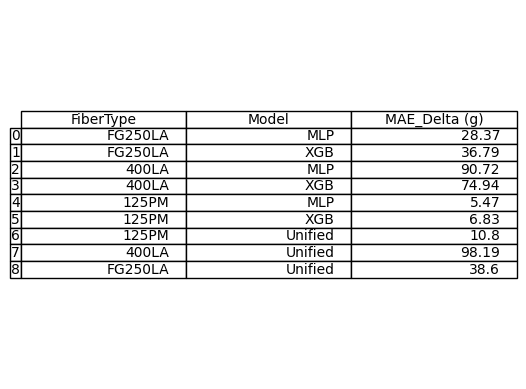

In [69]:
from pandas.plotting import table

ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
table(ax, data_df, loc="center")
plt.savefig("C:\\Users\\clombardi\\mae_delta.png")

0.41505325185508524


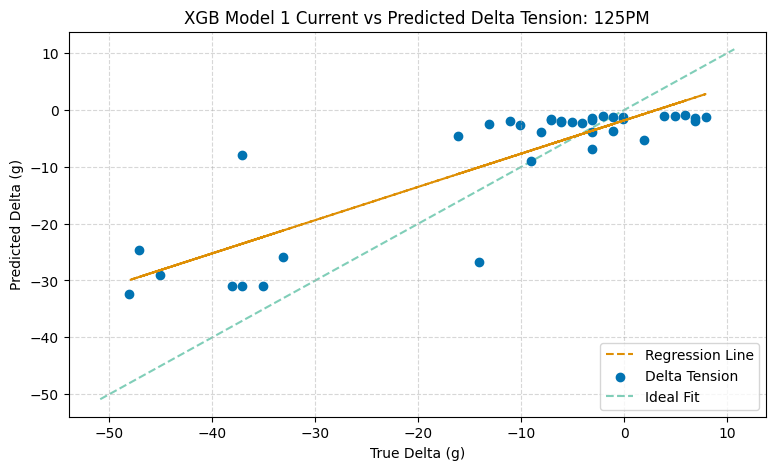

In [128]:
plot_deltas(df, "XGB Model 1 Current vs Predicted Delta Tension: 125PM", "current_vs_predicted_delta_xgb_125PM")

0.5849467481449151


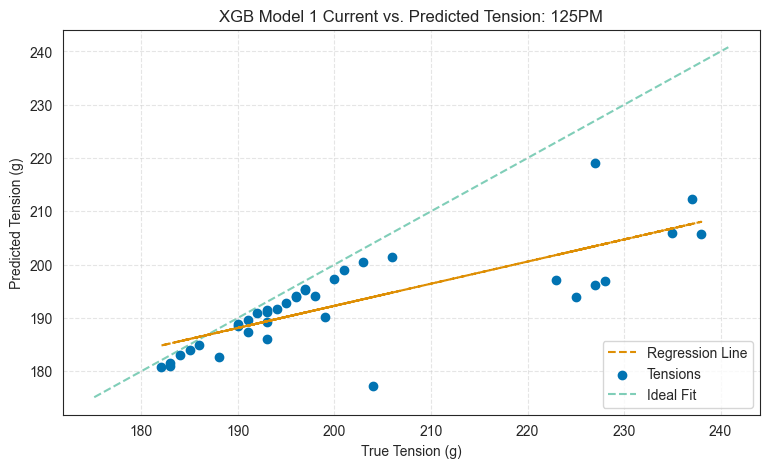

In [70]:
plot_current_vs_pred(df, "XGB Model 1 Current vs. Predicted Tension: 125PM", "current_vs_predicted_xgb_125PM")

In [31]:
csv_path = "C:\\Users\\clombardi\\Training_Runs_7_2\\Individual_Trials\\mlp_model_1_performance.csv"
df = pd.read_csv(csv_path)

In [32]:
mae_delta5 = calc_mae_delta(df)
mae_delta5

np.float64(5.469637931034483)

0.8080995728762785


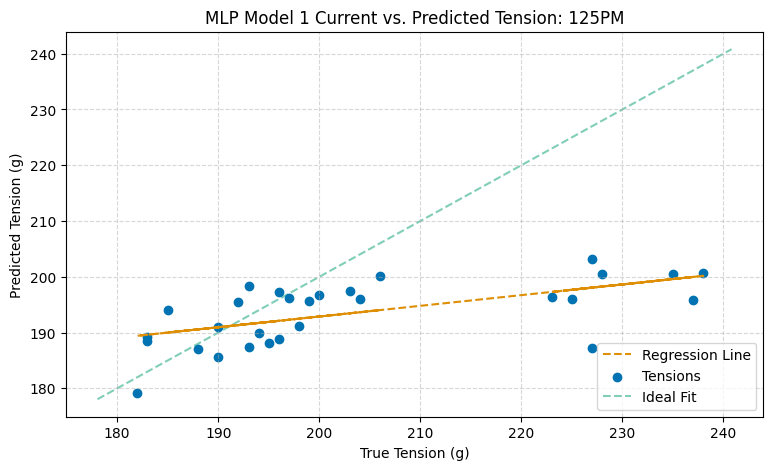

In [135]:
plot_current_vs_pred(df, "MLP Model 1 Current vs. Predicted Tension: 125PM", "current_vs_predicted_mlp_125PM")

0.19190042712372135


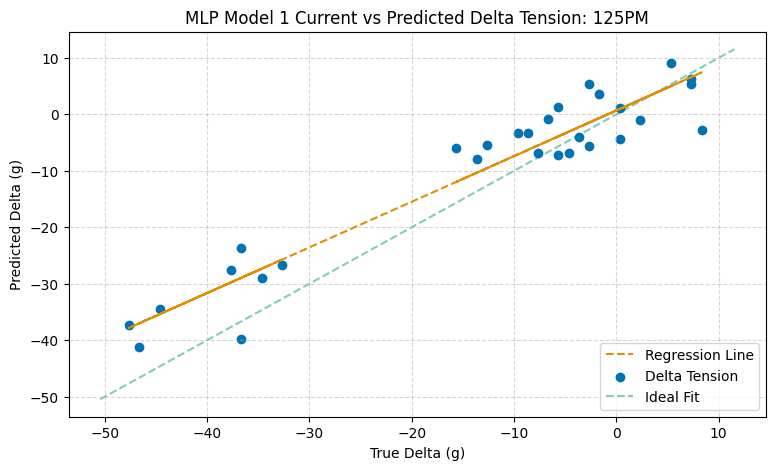

In [136]:
plot_deltas(df, "MLP Model 1 Current vs Predicted Delta Tension: 125PM", "current_vs_predicted_delta_mlp_125PM")

In [59]:
csv_path = "G:\\Intern_Project_2025\\metrics\\Unified_regressor_performance.csv"
df = pd.read_csv(csv_path)

In [58]:
def calc_mae_unified(df, limits):
    pred_delta = df['pred_delta'].loc[limits[0]:limits[1]]
    true_delta = df['true_delta'].loc[limits[0]:limits[1]]
    return np.mean(np.abs(true_delta - pred_delta))

In [66]:
mae_delta9 = calc_mae_unified(df, (76,None))
mae_delta9

np.float64(38.595524)

0.3599305759404674


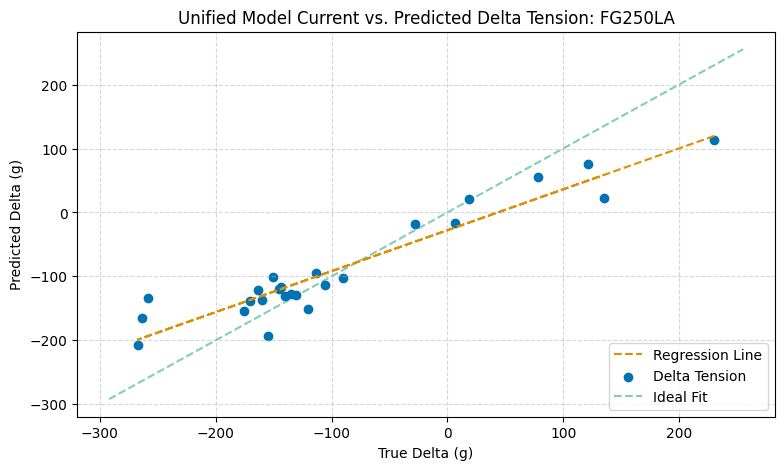

In [140]:
pred_delta = df['pred_delta'].loc[76:]
true_delta = df['true_delta'].loc[76:]
fig, ax = plt.subplots(figsize=(9,5))
ax.set_title("Unified Model Current vs. Predicted Delta Tension: FG250LA")
ax.set_xlabel("True Delta (g)")
ax.set_ylabel("Predicted Delta (g)")
slope, intercept = np.polyfit(true_delta, pred_delta, deg=1)
y_pred = np.polyval((slope, intercept), true_delta)
ax.plot(true_delta, y_pred, color=palette[1], linestyle="--", label="Regression Line")
ax.scatter(true_delta, pred_delta, label="Delta Tension", color=palette[0])
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  
np.max([ax.get_xlim(), ax.get_ylim()]), 
]
plt.plot(lims, lims, '--', alpha=0.5, zorder=0, color=palette[2], label='Ideal Fit') 
ax.legend(loc="lower right")
plt.savefig(f"C:\\Users\\clombardi\\current_vs_predicted_delta_unified_FG250LA.png")
plt.grid(True, alpha=0.5, linestyle="--")
print(1-slope)
plt.savefig(f"G:\\Intern_Project_2025\\metrics\\XGBoost_MLP_metrics\\current_vs_predicted_delta_unified_FG250LA.png")

In [262]:
pd.set_option('display.max_rows', 100)

0.4097241060673089


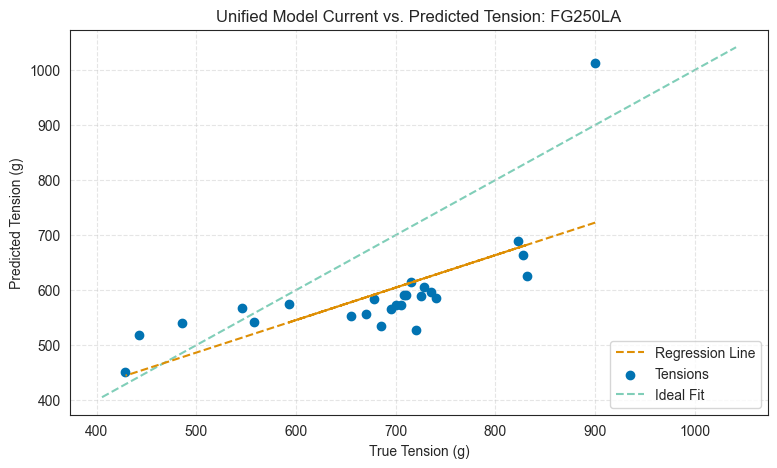

In [78]:
current_tensions = df['current_tension'].loc[76:]
predicted_tensions = df['pred_t'].loc[76:]
fig, ax = plt.subplots(figsize=(9,5))
x = np.arange(len(current_tensions))
ax.set_title("Unified Model Current vs. Predicted Tension: FG250LA")
ax.set_xlabel("True Tension (g)")
ax.set_ylabel("Predicted Tension (g)")
slope, intercept = np.polyfit(current_tensions, predicted_tensions, deg=1)
y_pred = np.polyval((slope, intercept), current_tensions)
ax.plot(current_tensions, y_pred, color=palette[1], linestyle="--", label="Regression Line")
ax.scatter(current_tensions, predicted_tensions, label="Tensions", color=palette[0])
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  
np.max([ax.get_xlim(), ax.get_ylim()]), 
]
plt.plot(lims, lims, '--', alpha=0.5, zorder=0, color=palette[2], label='Ideal Fit') 
ax.legend(loc="lower right")
plt.savefig(f"C:\\Users\\clombardi\\current_vs_predicted_unified_FG250LA.png")
plt.grid(True, alpha=0.5, linestyle="--")
print(1-slope)
plt.savefig(f"G:\\Intern_Project_2025\\metrics\\XGBoost_MLP_metrics\\current_vs_predicted_unified_FG250LA.png")